# Parsing examples

Some examples on parsing to and from supported formats. More info about all
parsing methods can be found in the [manual section](../manual/parsing.rst).

## Declare paths

First, let's do all the necessary imports and generate the paths that we'll use
for file import and export.

In [1]:
from pathlib import Path
import pygaps.parsing as pgp

# Get directory paths
base_path = Path.cwd() / 'data' / 'parsing'

# Find files
aif_file_paths = list((base_path / 'aif').rglob('*.aif'))
json_file_paths = list((base_path / 'json').rglob('*.json'))
xl_file_paths = list((base_path / 'excel').rglob('*.xls'))
csv_file_paths = list((base_path / 'csv').rglob('*.csv'))

## Manufacturer import

Many report files from various adsorption device manufacturers can be imported
directly using pyGAPS. Here are some examples.

In [4]:
cfld = base_path / "commercial"
dvssms = pgp.isotherm_from_commercial(cfld / "smsdvs" / "13X water 30c.xlsx", 'smsdvs', 'xlsx')
micromeritics = pgp.isotherm_from_commercial(cfld / "mic" / "Sample_A.xls", 'mic', 'xl')
belsorp_dat = pgp.isotherm_from_commercial(cfld / "bel" / "BF010_DUT-13_CH4_111K_run2.DAT", 'bel', 'dat')
belsorp_xl = pgp.isotherm_from_commercial(cfld / "bel" / "Sample_C.xls", 'bel', 'xl')
threeP_xl = pgp.isotherm_from_commercial(cfld / "3p" / "AC_ref_filter_Ar_87K_run 3_rep.xlsx", '3p', 'xl')
quantachrome = pgp.isotherm_from_commercial(cfld / "qnt" / "BF001 (Raw Analysis Data).txt", 'qnt', 'txt-raw')

Specified adsorbate is not in internal list (or name cannot be resolved to an existing one). Thermodynamic backend disabled for this gas/vapour.


## AIF Parsing
### AIF Import

Adsorption information files are fully supported in pyGAPS, both for import and
exports. Isotherms can be imported from an `.aif` as:

In [5]:
# Import all
isotherms = [pgp.isotherm_from_aif(path) for path in aif_file_paths]

# Display an example file
print(isotherms[1])

Material: DMOF
Adsorbate: ethane
Temperature: 298.15K
Units: 
	Uptake in: cm3(STP)/g
	Pressure in: kPa
Other properties: 
	user: single gas
	date: 2019-08-19T00:00:00
	instrument: BEL VC-05
	material_mass: 0.817
	material_batch: [Zn2(tm-bdc)2(dabco)]
	material_mass_unit: g



### AIF Export

Similarly, an isotherm can be exported as an AIF file or a string, depending on
whether a path is passed. For this purpose use either the module
`pygaps.isotherm_to_aif()` function or the convenience class function
`to_aif()`.

In [12]:
# module function
for isotherm, path in zip(isotherms, aif_file_paths):
    pgp.isotherm_to_aif(isotherm, path)

# save to file with convenience function
isotherms[0].to_aif('isotherm.aif')

# string
isotherm_string = isotherms[0].to_aif()

## JSON Parsing
### JSON Import

Isotherms can be imported either from a json file or from a json string. The
same function is used in both cases.

In [7]:
# Import them
isotherms = [pgp.isotherm_from_json(path) for path in json_file_paths]

# Display an example file
print(isotherms[1])

Material: TEST
Adsorbate: n-butane
Temperature: 298.15K
Units: 
	Uptake in: g/g
	Pressure in: bar
Other properties: 
	iso_type: isotherm
	material_batch: TB



### JSON Export

Exporting to JSON can be done to a file or a string, depending on whether a path
is passed. For this purpose use either the module `pygaps.isotherm_to_json()`
function or the convenience class function `to_json()`.

In [11]:
# module function
for isotherm, path in zip(isotherms, json_file_paths):
    pgp.isotherm_to_json(isotherm, path, indent=4)

# save to file with convenience function
isotherms[0].to_json('isotherm.json')

# string
isotherm_string = isotherms[0].to_json()

## Excel Parsing

Excel *does not* have to be installed on the system in use.

### Excel Import

In [9]:
# Import them
isotherms = [pgp.isotherm_from_xl(path) for path in xl_file_paths]

# Display an example file
print(isotherms[1])

The file version is None while the parser uses version 3.0. Strange things might happen, so double check your data.
The file version is None while the parser uses version 3.0. Strange things might happen, so double check your data.
Material: MCM-41
Adsorbate: nitrogen
Temperature: 77.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	comment: None
	date: None
	lab: MADIREL
	instrument: Triflex
	project: None
	activation_temperature: 150.0
	user: PI
	iso_type: Isotherme
	material_batch: Test



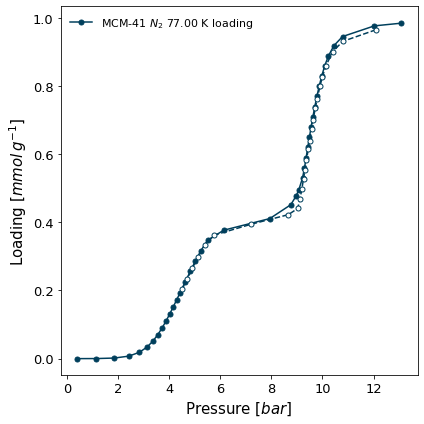

In [10]:
isotherms[1].plot()

### Excel Export

In [11]:
# Export each isotherm in turn
for isotherm, path in zip(isotherms, xl_file_paths):
    pgp.isotherm_to_xl(isotherm, path)

# save to file with convenience function
isotherms[0].to_xl('isotherm.xls')

## CSV Parsing
### CSV Import


Like JSON, isotherms can be imported either from a CSV file or from a CSV string. The same function is used in both cases.

In [12]:
# Import them
isotherms = [pgp.isotherm_from_csv(path) for path in csv_file_paths]

# Display an example file
print(isotherms[0])

Material: HKUST-1(Cu)
Adsorbate: carbon dioxide
Temperature: 303.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	material_batch: Test
	iso_type: Calorimetrie
	user: ADW
	machine: CV
	date: 21/05/2010 00:00
	activation_temperature: 150.0
	lab: MADIREL



### CSV Export

In [13]:
# Export each isotherm in turn
for isotherm, path in zip(isotherms, csv_file_paths):
    pgp.isotherm_to_csv(isotherm, path)

# save to file with convenience function
isotherms[0].to_csv('isotherm.csv')

# string representation
isotherm_string = isotherms[0].to_csv()